### Importing necessary libs

In [2]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Loading the dataset

In [3]:
data=pd.read_csv("AQI_Data.csv")

In [4]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
data=data.dropna()

In [8]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [9]:
X=data.iloc[:,:-1] ## independent features
Y=data.iloc[:,-1]  ## dependent features

In [10]:
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [11]:
Y.isnull().sum()

0

#### Feature Importances

In [12]:
model=ExtraTreesRegressor()

In [13]:
model.fit(X,Y)

ExtraTreesRegressor()

In [14]:
print(model.feature_importances_)

[0.18851414 0.08869419 0.22619868 0.12225536 0.08712575 0.19222526
 0.05279437 0.04219225]


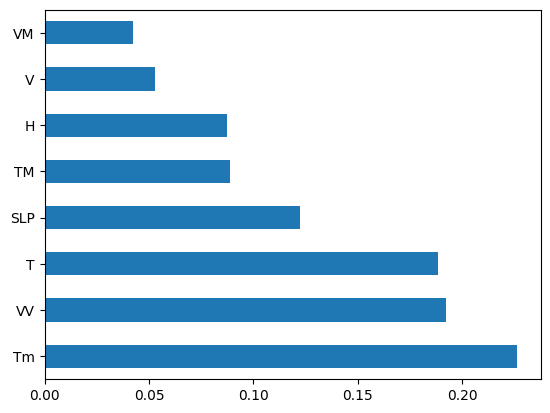

In [15]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

### Decision Tree Regressor

C:\Users\kanch\AppData\Local\Temp\ipykernel_27692\3269117342.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='PM 2.5', ylabel='Density'>

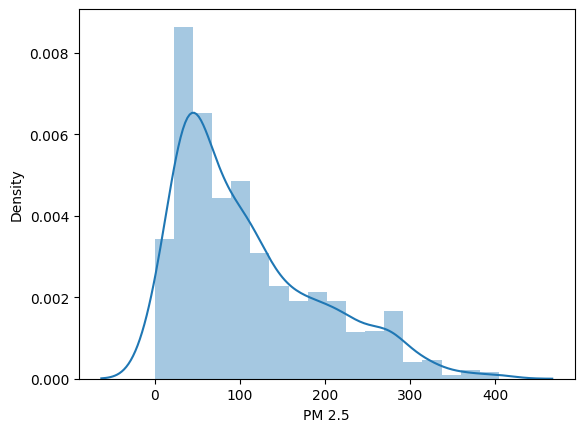

In [16]:
sns.distplot(Y)

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtree=DecisionTreeRegressor(criterion="squared_error")

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [22]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.6626408682467755


### Model Evaluation

In [23]:
prediction=dtree.predict(X_test)

C:\Users\kanch\AppData\Local\Temp\ipykernel_27692\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='PM 2.5', ylabel='Density'>

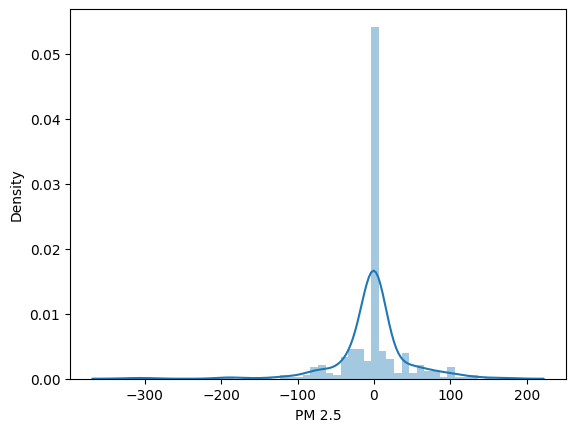

In [24]:
sns.distplot(y_test-prediction)

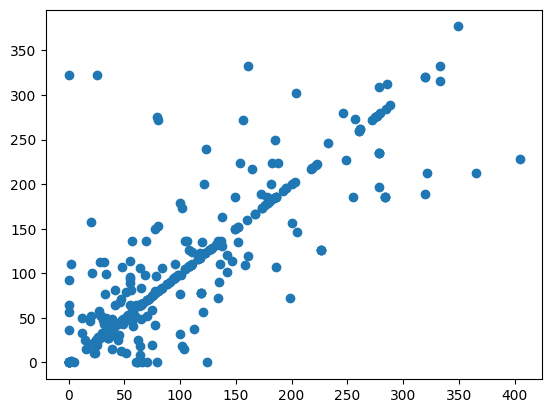

In [25]:
plt.scatter(y_test,prediction)

### Hyperparameter tuning

In [26]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [27]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [28]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [29]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [30]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [33]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 1 minutes and 2.87 seconds.


C:\Users\kanch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [34]:
random_search.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [35]:
random_search.best_score_

-3131.6489619178874

In [36]:
predictions=random_search.predict(X_test)

C:\Users\kanch\AppData\Local\Temp\ipykernel_27692\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='PM 2.5', ylabel='Density'>

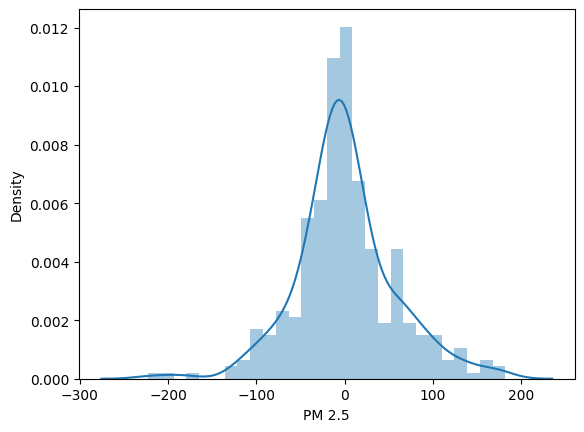

In [37]:
sns.distplot(y_test-predictions)

### Evaluation

In [44]:
from sklearn import metrics
import numpy as np

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 24.621214430894312
MSE: 2416.7738167979337
RMSE: 49.160693819330234
